## Binary classification for kickstart projects

## _**Abstract**_
Kickstarter is a crowdfunding platform launched in 2009 by Perry Chen, Yancey Strickler, Charles Adler. Throughout the years, it has gained popularity among similar websites, primarily thanks to its farseeing view and mission; to “help bring creative projects to life”. Many projects funded in this way have been successful and reached high popularity, for instance one of the most popular projects funded was Pebble an e-paper watch for Android and iOS in 2012, it managed to reach 68929 backers and it raised 10266845 USD. 

Kickstarter process to create a project is straightforward: project owners provide all the informations about their idea (design, trailer, function, cost, timing etc.), backers instead back the projects that are more valuable and interesting to them.

Success or failure of a Kickstarter project can depend on many factors, are those predictable? The aim of this machine learning-based project is to answer this question by investigating Kickstarter data.

## Dataset
The dataset is taken from Kaggle and it will be [Kickstarter-project-201801.csv](./Kickstarter-project-201801.csv). It provides 15 columns with information such as name of the project, launch date, deadline, state, pledged, category, backers, etc.

## **Workflow - python based** 
### Data processing and filtering. 
1. Deleting all those entries which do not fulfill the binary condition (state = 'Success' or 'Failed').

2. Inspecting data should answer the following:
    - Is the length of the kickstarter campaign important for its success? 
    - Can the main category of the kickstarter project influence the outcome of the campaign?
    - Is the money goal (USD currency), correlated to the main category, an important feature to consider?


### Model building. 
It will consist in choosing the algorithm that can fit best the data and could give the best outcome based on the feature we found in the previous step.

### Conclusion.
The model should answer the question: 
>*will it be a success or a failure?* 

## __Notebook__

### 1. Importing the dataset and filtering

In [19]:
# import Libraries

import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import matplotlib.font_manager
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy import stats

sn.set()

In [20]:
# import data
filepath = "Kickstarter-project-201801.csv"


data = pd.read_csv(filepath,
                sep=",")

In [21]:
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


#### **State column**

Let's inspect the ```state``` column. We want to restrict our classification to only two conditions: 
   1. Successful 
   2. Failed. 
   
First thing first we check if we have enough data to exploit for building our model.

In [22]:
state = data['state'].value_counts().reset_index()
state_df = pd.DataFrame(state)
state_df

,index,state
0,failed,197719
1,successful,133956
2,canceled,38779
3,undefined,3562
4,live,2799
5,suspended,1846


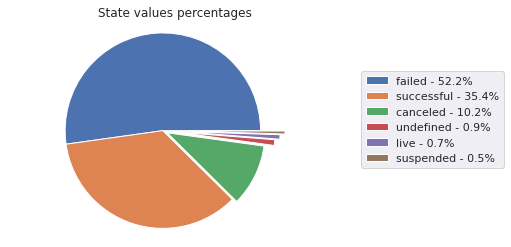

In [5]:
fig, ax = plt.subplots()
labels = state_df['index']
total = state_df['state'].sum()

explode=(0,0.0,0.05,0.15,0.2,0.25)

ax.pie(state_df['state'], 
       explode = explode,
       shadow=False,
       labeldistance=1.4)

ax.axis('equal')
ax.legend(frameon=True, 
          bbox_to_anchor=(1.5,0.8), 
          labels=['%s - %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, state_df['state'])]
         )
plt.title('State values percentages', loc = 'center')
plt.show()

The ```failed``` and ```successful``` states account for the 87.6% of the total amount of data, that is: 

In [23]:
state_df.state[0:2].sum() # sum of successful and failed 

331675

Lets extract only those ```331675``` entries.

In [24]:
data = data[(data['state'] == 'failed') | (data['state'] == 'successful')]

In [25]:
data.shape

(331675, 15)

### 2. Inspecting data

#### **Campaign lenght**

> **Is the length of the kickstarter campaign important for its success?**
 

Let's see the impact the duration of the Kickstarter campaign has on the successfull/failure rate.

In [26]:
# we compute the duration by taking into account the 'deadline' column and the 'launched' column
data['length_days'] = (pd.to_datetime(data['deadline']) - pd.to_datetime(data['launched']))
data['length_days'].dtypes

/home/fecke/anaconda3/envs/aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('<m8[ns]')

In [27]:
# we convert the col. 'length_days' in int64
data['length_days'] = data['length_days'].dt.days

/home/fecke/anaconda3/envs/aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
data['length_days'].dtypes

dtype('int64')

In [29]:
data.sort_values(by = 'length_days')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,length_days
370904,959890458,Living Your Best Life,Digital Art,Art,SGD,2016-08-02,5.0,2016-08-01 21:44:53,8.01,successful,4,SG,0.00,5.98,3.73,0
257510,379385592,le chocolat,Food,Food,GBP,2017-01-06,1200.0,2017-01-05 17:11:36,1209.00,successful,1,GB,0.00,1494.73,1483.61,0
190908,1971488760,Sexy Astronaut for It's a Spaceship Now,Theater,Theater,USD,2015-09-27,24.0,2015-09-26 18:55:10,61.00,successful,13,US,61.00,61.00,24.00,0
377311,993249553,1st Annual Brian Kesinger Christmas Ornament,Art,Art,USD,2017-12-15,1000.0,2017-12-14 09:01:39,9244.00,successful,59,US,9244.00,9244.00,1000.00,0
316239,680869594,Bug: Always Watching THE SQL,Art,Art,HKD,2016-08-19,10.0,2016-08-18 05:36:15,10.00,successful,1,HK,1.29,1.29,1.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226191,219842080,Wales & The Welsh - the shaping of a people an...,Documentary,Film & Video,USD,2011-04-02,5900.0,2010-12-31 19:01:33,550.00,failed,15,US,550.00,550.00,5900.00,91
22618,1114753005,Fair Trade Fashion by SET Boutique,Fashion,Fashion,USD,2011-04-04,7000.0,2011-01-02 20:21:23,817.00,failed,20,US,817.00,817.00,7000.00,91
200310,202011453,We Were Vampire,Film & Video,Film & Video,USD,2011-04-04,250000.0,2011-01-02 01:34:48,0.00,failed,0,US,0.00,0.00,250000.00,91
305126,623776234,once upon a mountain,Documentary,Film & Video,USD,2011-04-04,20000.0,2011-01-02 02:35:59,1530.00,failed,4,US,1530.00,1530.00,20000.00,91


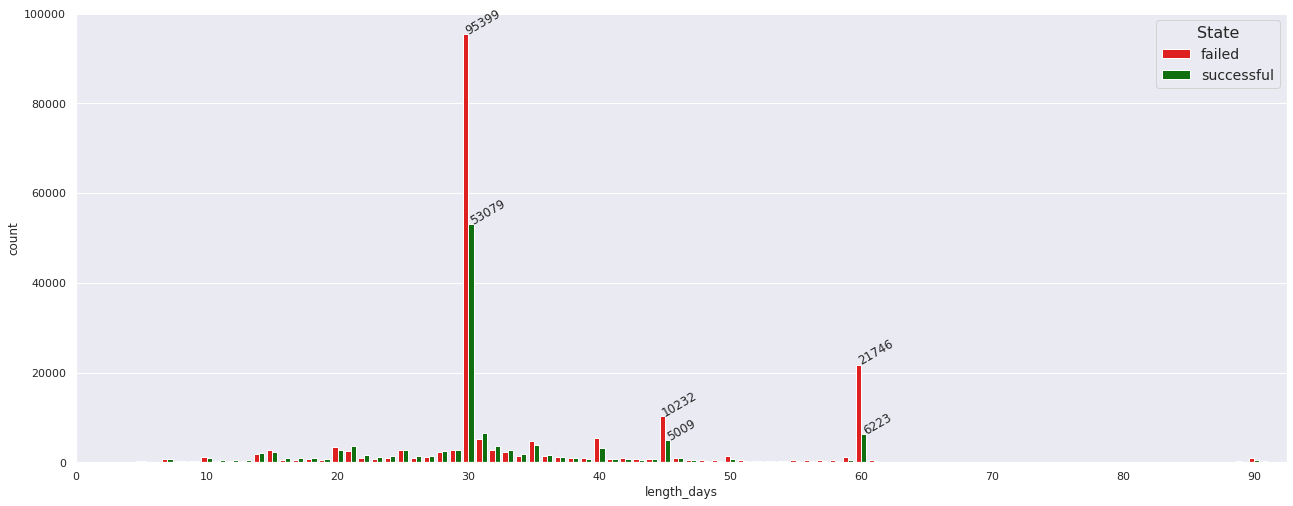

In [30]:
# plotting
sn.set(rc={'figure.figsize':(21.7,8.27)})

g = sn.countplot(data = data, palette = {'successful':'green', 'failed':'red'}, x = 'length_days', hue = 'state')

new_ticks = [i.get_text() for i in g.get_xticklabels()]
plt.xticks(range(-1, len(new_ticks), 10), new_ticks[::10]);
plt.legend(fontsize = 14, title = 'State',title_fontsize = 16)
# g.set_yscale('log')
    
l = []

for (p,q) in zip(g.patches[:92], g.patches[92:]):
    l.append([int(p.get_height()) - int(q.get_height()), int(q.get_x())]) # storing difference in number of fail and success projects and duration
    if abs(int(p.get_height()) - int(q.get_height())) > 5000: # add labels where the difference between failures and successes are higher than N (5000)
        txtp, txtq = str(p.get_height()), str(q.get_height())
        txt_xp, txt_xq = p.get_x(), q.get_x()
        txt_yp, txt_yq = p.get_height(), q.get_height()
        g.text(txt_xp,txt_yp,txtp, rotation = 30)
        g.text(txt_xq,txt_yq,txtq, rotation = 30)

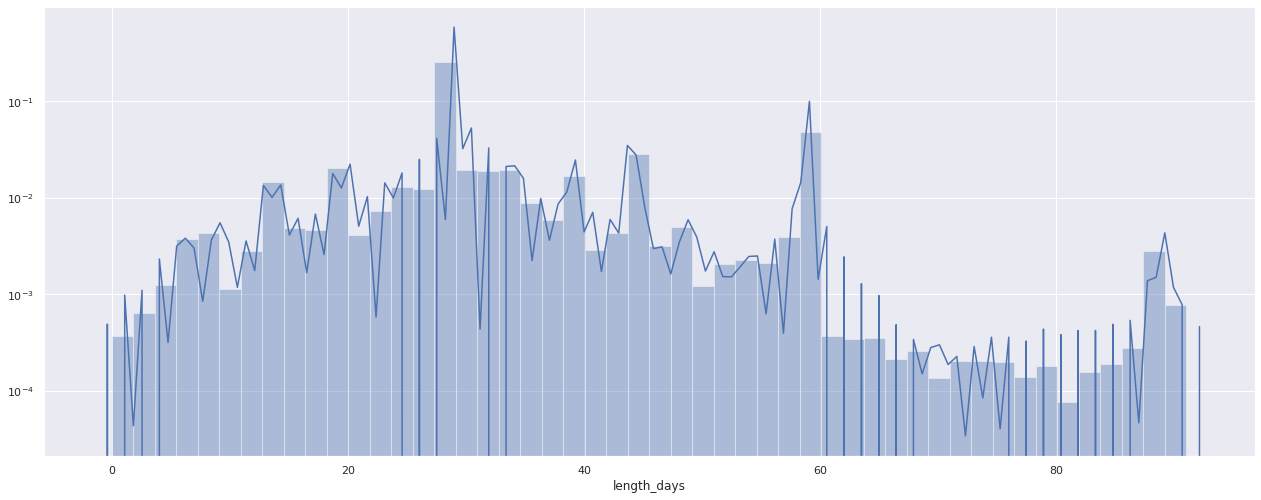

In [31]:
g =sn.distplot(data['length_days'])
g.set_yscale('log')

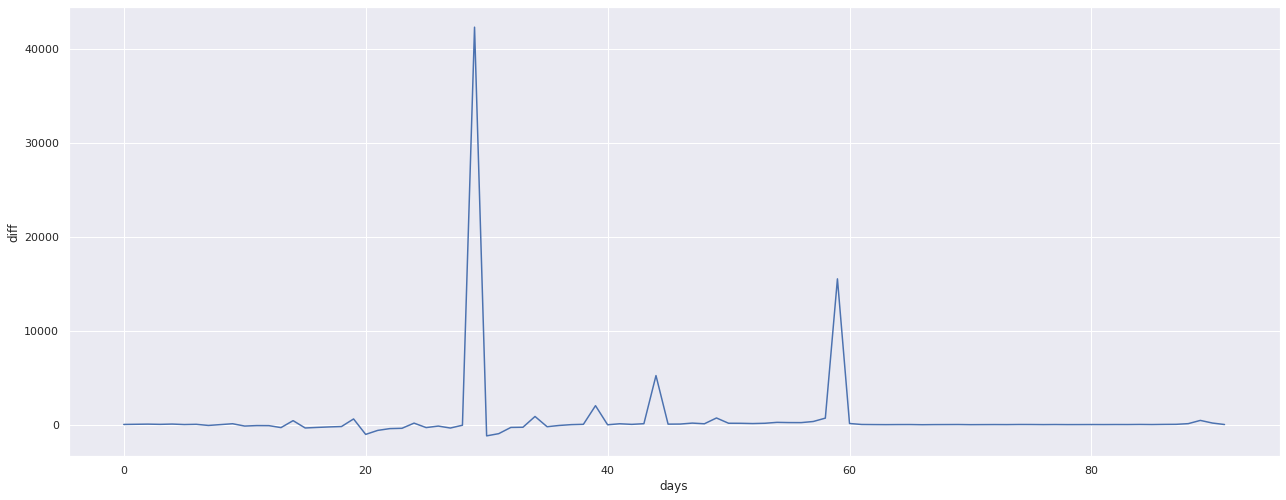

In [32]:
l = pd.DataFrame(l, columns = ['diff', 'days'])
ax = sn.lineplot(y="diff", x="days", data=l)

__Observations:__

We can definitely observe how at 30, 45 and 60 days the number of projects is higher than the other time. Same trend that we can observe by taking into account the number of failed project in respect to the successful ones. 
We can make some statements:
- If the duration of the campaign had any influence on the outcome of the project we should have observed a linear correlation between project duration and difference between failed and successed projects. Indeed we could have imagined that, given a short period of time, there could be more struggling in meeting the goal. This trend is not observed.
- We find significant number of projects of duration 30, 45 and 60 days, this is probably due to the fact that people tend to use this time windows as standards, therefore we observe these spikes on those days.
Does this influence the outcome of the projects? It doesn't seem so. 


#### **Main category**

> **Can the main category of the kickstarter project influence the outcome of the campaign?**

To answer this question we inspect the main category column by grouping it with the state one, in order to evaluate if this can be an interesting feature to consider. Maybe some categories have more backers than others, are more appealing and therefore more successful. Let's see:

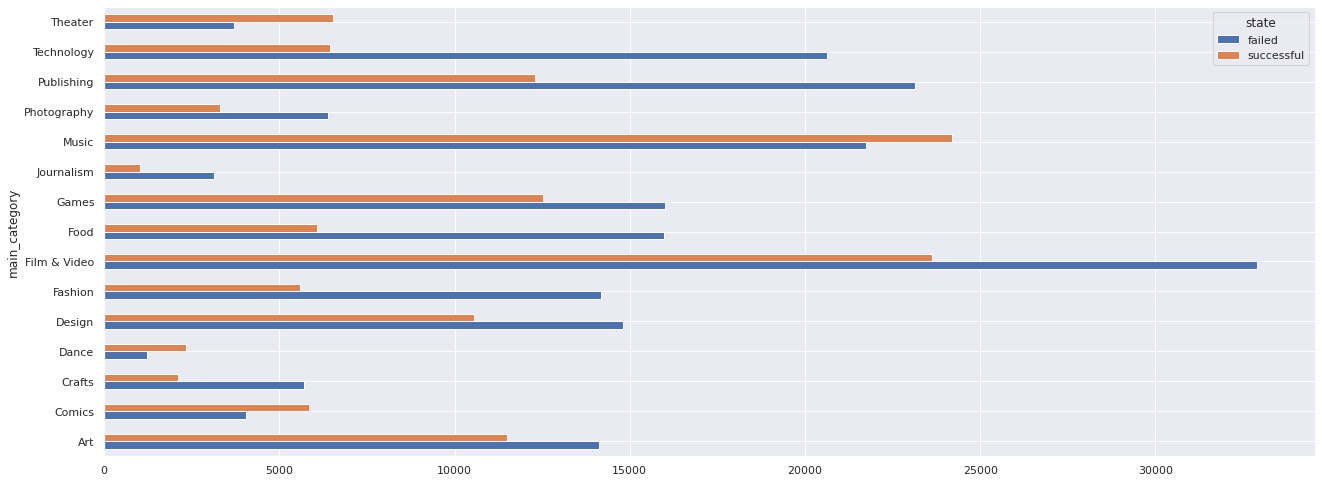

In [33]:
data.groupby('state').main_category.value_counts().unstack(0).plot.barh()

It does seem like there could be some correlation with certain categories, there are quite few categories where the number of successful projects are more than the failed ones, we could see if this pattern is correlated with the goal of the project, maybe there are more failure in technology and film & video rather than comics because the amount of money needed is indeed way higher in the first case. Let's verify this hypothesis.

First thing first we want to restrict our analysis only on those entry with the same currency, let's inspect this aspect of the dataset:

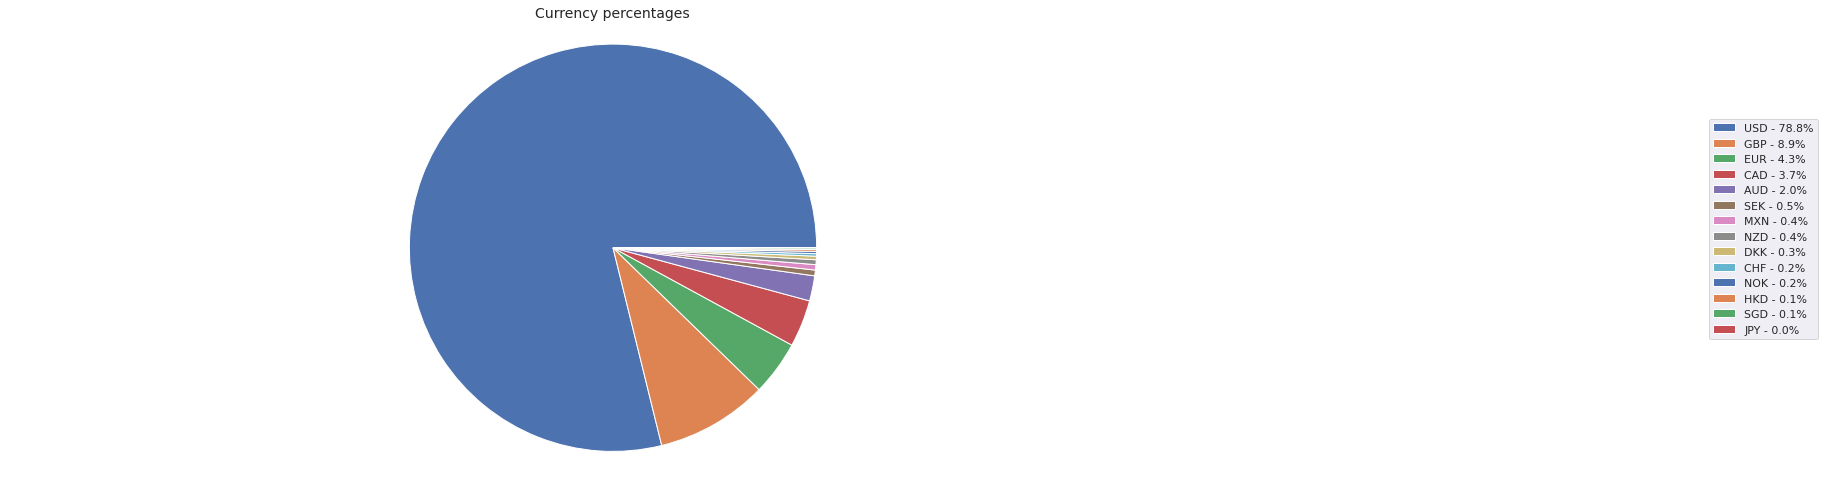

In [34]:
currency = data['currency'].value_counts().reset_index()
curr_df = pd.DataFrame(currency)
curr_df

fig, ax = plt.subplots()
labels = curr_df['index']
total = curr_df['currency'].sum()

explode=(0,0.0,0.05,0.15,0.2,0.25)

ax.pie(curr_df['currency'],# explode = explode,
       shadow=False,
       labeldistance=1.4)

ax.axis('equal')
ax.legend(frameon=True, 
          bbox_to_anchor=(1.5,0.8), 
          labels=['%s - %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, curr_df['currency'])]
         )
plt.title('Currency percentages', loc = 'center', size = 14)
plt.show()

In [35]:
# restricting only on USD currency
data = data[(data['currency'] == 'USD')]
data.shape

(261511, 16)

In [36]:
mcat_goal = data.groupby("main_category").agg({"goal" : "mean"}) 
mcat_goal = mcat_goal.reset_index().rename(columns={"goal" : "main-cat_mean-goal"})
data = data.merge(mcat_goal, on = "main_category")

data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,length_days,main-cat_mean-goal
0,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.0,59,72246.331926
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.0,44,72246.331926
2,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.0,29,72246.331926
3,1000129669,Squatch Watchers,Webseries,Film & Video,USD,2013-08-23,10000.0,2013-07-24 21:40:13,1373.37,failed,54,US,1373.37,1373.37,10000.0,29,72246.331926
4,1000132945,Zen in America: a film on Zen Buddhism in Nort...,Documentary,Film & Video,USD,2013-10-21,10000.0,2013-09-21 23:00:54,15663.00,successful,213,US,15663.00,15663.00,10000.0,29,72246.331926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261506,998302947,Ruffed'up on the Road!,Print,Journalism,USD,2016-09-28,850.0,2016-08-29 15:07:18,910.00,successful,19,US,75.00,910.00,850.0,29,80283.469267
261507,998581895,"82 Cubanos - A Photo Journal of Havana, Cuba",Print,Journalism,USD,2015-12-22,300.0,2015-10-23 00:43:43,440.00,successful,12,US,440.00,440.00,300.0,59,80283.469267
261508,99915068,Investigating the Alaskan Pyramid,Journalism,Journalism,USD,2016-02-11,4800.0,2015-12-13 23:51:46,35.00,failed,2,US,35.00,35.00,4800.0,59,80283.469267
261509,999668351,CAT in WATER,Journalism,Journalism,USD,2011-05-27,7500.0,2011-02-25 00:25:31,8462.00,successful,123,US,8462.00,8462.00,7500.0,90,80283.469267


Let's inspect the goal feature: we will inspect the mean goal for successful projects and failed ones. 

In [37]:
# compute the successful goal
goal_success = data[data['state'] == 'successful'].groupby(['main_category']).mean()['goal']

# compute the failed goal
goal_failed = data[data['state'] == 'failed'].groupby(['main_category']).mean()['goal']

goal_v1 = pd.DataFrame(goal_success)
goal_v1.rename(columns={'goal':'goal_succ'}, 
                 inplace=True)
goal_v1['goal_failed'] = goal_failed


mean_goal =  data.drop_duplicates(subset = ["main-cat_mean-goal"])
mean_goal = mean_goal[['main_category','main-cat_mean-goal']]
mean_goal = mean_goal.set_index('main_category')

goal_v1['total_goal'] = mean_goal['main-cat_mean-goal']

goal_v1['diff_failed'] = goal_v1['total_goal'] - goal_v1['goal_failed']

goal_v1.reset_index()

,main_category,goal_succ,goal_failed,total_goal,diff_failed
0,Art,4522.808137,56330.518536,32272.324104,-24058.194433
1,Comics,5639.630081,48072.558041,23004.937896,-25067.620146
2,Crafts,2989.250000,13274.682165,10445.886467,-2828.795699
3,Dance,4745.958865,15388.366757,8175.985167,-7212.381590
4,Design,16008.036128,55662.133138,39184.820769,-16477.312368
5,Fashion,9165.043083,27910.283252,22597.240496,-5313.042756
6,Film & Video,11867.855917,116244.653613,72246.331926,-43998.321687
7,Food,11811.511067,43857.183163,34349.927259,-9507.255904
8,Games,16002.603142,66330.527980,43053.645051,-23276.882930
9,Journalism,8226.529361,105165.095422,80283.469267,-24881.626155


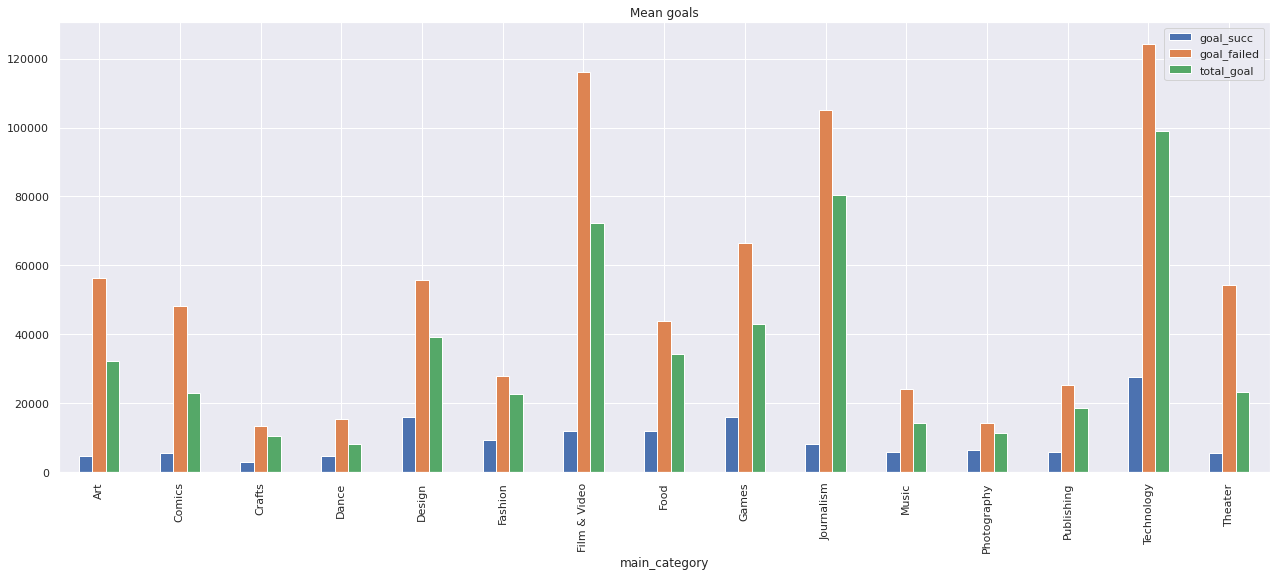

In [38]:
goal_v1.iloc[:, :-1].plot(kind="bar", title="Mean goals", stacked=False)


As we can see from the chart, the average goal for failed projects is quite higher than the overall average goal, indeed it seems that setting the initial goal too high in certain categories could be one of the reason for a failure of a project. 

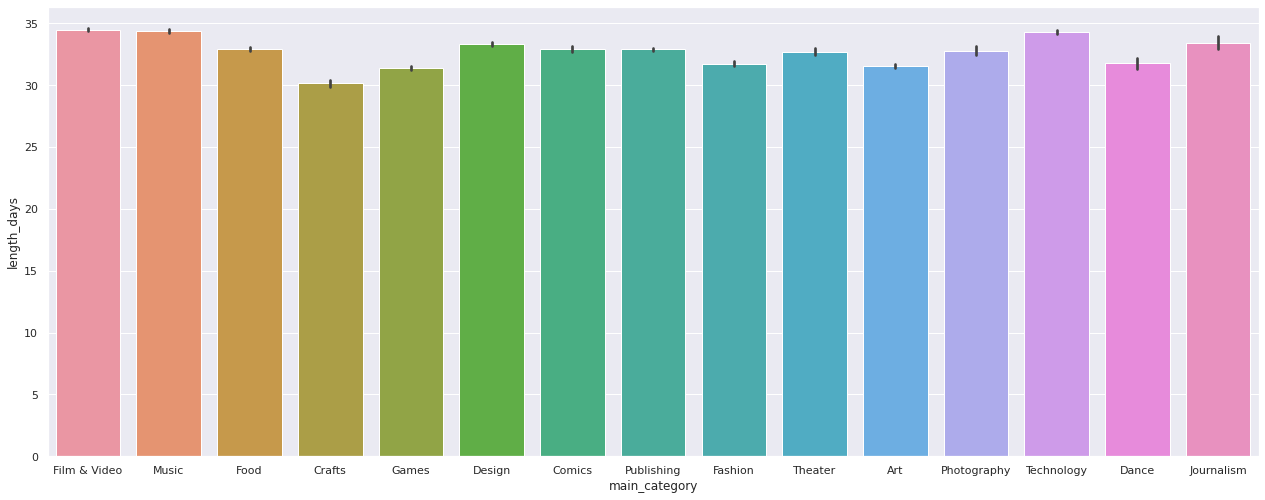

In [39]:
# Plotting duration of campaign for each main category
sn.set(rc={'figure.figsize':(21.7,8.27)})
sn.barplot(y = data['length_days'], x = data['main_category'])

The features we will take into account are:
- Category and main category: it seems that people are more interested in some categoriest rather than others
- goal: setting it too high may prevent a positive outcome
- mean goal per category
- difference between mean goal and actual goal for each sample

### 3. Data preparation

In [40]:
finaldata = data.dropna()
finaldata = finaldata.drop(["ID", "currency", "country", "pledged", "usd pledged", "usd_pledged_real", "usd_goal_real", 'launched', 'deadline'], axis = 1)

finaldata
#261358

,name,category,main_category,goal,state,backers,length_days,main-cat_mean-goal
0,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.0,failed,15,59,72246.331926
1,Where is Hank?,Narrative Film,Film & Video,45000.0,failed,3,44,72246.331926
2,My Moon - Animated Short Film,Animation,Film & Video,50000.0,successful,840,29,72246.331926
3,Squatch Watchers,Webseries,Film & Video,10000.0,failed,54,29,72246.331926
4,Zen in America: a film on Zen Buddhism in Nort...,Documentary,Film & Video,10000.0,successful,213,29,72246.331926
...,...,...,...,...,...,...,...,...
261506,Ruffed'up on the Road!,Print,Journalism,850.0,successful,19,29,80283.469267
261507,"82 Cubanos - A Photo Journal of Havana, Cuba",Print,Journalism,300.0,successful,12,59,80283.469267
261508,Investigating the Alaskan Pyramid,Journalism,Journalism,4800.0,failed,2,59,80283.469267
261509,CAT in WATER,Journalism,Journalism,7500.0,successful,123,90,80283.469267


In [41]:
finaldata["state"] = finaldata["state"].apply(lambda x: 1 if x=="successful" else 0)

le = LabelEncoder()
for c in ["category", "main_category"]:
    finaldata[c] = le.fit_transform(finaldata[c])

finaldata

,name,category,main_category,goal,state,backers,length_days,main-cat_mean-goal
0,Greeting From Earth: ZGAC Arts Capsule For ET,93,6,30000.0,0,15,59,72246.331926
1,Where is Hank?,93,6,45000.0,0,3,44,72246.331926
2,My Moon - Animated Short Film,5,6,50000.0,1,840,29,72246.331926
3,Squatch Watchers,153,6,10000.0,0,54,29,72246.331926
4,Zen in America: a film on Zen Buddhism in Nort...,39,6,10000.0,1,213,29,72246.331926
...,...,...,...,...,...,...,...,...
261506,Ruffed'up on the Road!,111,9,850.0,1,19,29,80283.469267
261507,"82 Cubanos - A Photo Journal of Havana, Cuba",111,9,300.0,1,12,59,80283.469267
261508,Investigating the Alaskan Pyramid,77,9,4800.0,0,2,59,80283.469267
261509,CAT in WATER,77,9,7500.0,1,123,90,80283.469267


## Model

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
## define predictors and label 
label = finaldata.state
features = [c for c in finaldata.columns if c not in ["state", "name", 'backers', 'length_days']]

## prepare training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(finaldata[features], label, test_size = 0.06, random_state = 2)
X_train1, y_train1 = X_train, y_train
X_test1, y_test1 = X_test, y_test

In [44]:
## train a decision tree classifier
modelDT = DecisionTreeClassifier(random_state=42).fit(X_train1, y_train1)
y_predDT = modelDT.predict(X_test1)

print(pd.crosstab(y_predDT, y_test1))
print('\nAccuracy percentage tree: ', modelDT.score(X_test1, y_test1))

state     0     1
row_0            
0      7001  3340
1      2161  3180

Accuracy percentage tree:  0.6492156612676955


In [52]:
## train a random forest classifier 
RF = RandomForestClassifier(random_state=42).fit(X_train1, y_train1)
ypRF = RF.predict(X_test1)

print(pd.crosstab(ypRF, y_test1))
print('\nAccuracy percentage random forest: ', modelRF.score(X_test1, y_test1)) 

state     0     1
row_0            
0      6913  3230
1      2249  3290

Accuracy percentage random forest:  0.6598010457849764


In [66]:
n_estimators = [100,300]
max_depth = [7, 14, 21]

forest = RandomForestClassifier(n_jobs = 4)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

gridF = GridSearchCV(forest,
                     hyperF,
                     cv = 3,
                     verbose = 5)

bestF = gridF.fit(X_train1, y_train1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=7, n_estimators=100, score=0.650, total=   7.0s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] ....... max_depth=7, n_estimators=100, score=0.651, total=   6.7s
[CV] max_depth=7, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.8s remaining:    0.0s


[CV] ....... max_depth=7, n_estimators=100, score=0.653, total=   6.2s
[CV] max_depth=7, n_estimators=300 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s remaining:    0.0s


[CV] ....... max_depth=7, n_estimators=300, score=0.652, total=  19.9s
[CV] max_depth=7, n_estimators=300 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   39.9s remaining:    0.0s


[CV] ....... max_depth=7, n_estimators=300, score=0.650, total=  20.3s
[CV] max_depth=7, n_estimators=300 ...................................
[CV] ....... max_depth=7, n_estimators=300, score=0.653, total=  20.4s
[CV] max_depth=14, n_estimators=100 ..................................
[CV] ...... max_depth=14, n_estimators=100, score=0.659, total=   9.9s
[CV] max_depth=14, n_estimators=100 ..................................
[CV] ...... max_depth=14, n_estimators=100, score=0.662, total=  10.0s
[CV] max_depth=14, n_estimators=100 ..................................
[CV] ...... max_depth=14, n_estimators=100, score=0.659, total=   9.9s
[CV] max_depth=14, n_estimators=300 ..................................
[CV] ...... max_depth=14, n_estimators=300, score=0.659, total=  29.6s
[CV] max_depth=14, n_estimators=300 ..................................
[CV] ...... max_depth=14, n_estimators=300, score=0.662, total=  29.6s
[CV] max_depth=14, n_estimators=300 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  5.8min finished


In [67]:
results = pd.DataFrame(bestF.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.346078,0.344810,0.315781,0.002798,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.650357,0.650772,0.652518,0.651215,0.000936,4
1,19.033307,0.210074,1.124701,0.003513,7,300,"{'max_depth': 7, 'n_estimators': 300}",0.652188,0.649856,0.652994,0.651679,0.001331,3
2,9.228632,0.058238,0.716777,0.000068,14,100,"{'max_depth': 14, 'n_estimators': 100}",0.659210,0.661689,0.659442,0.660113,0.001118,1
3,27.418439,0.028858,2.125313,0.004877,14,300,"{'max_depth': 14, 'n_estimators': 300}",0.658587,0.661750,0.659014,0.659784,0.001401,2
4,10.561884,0.067799,1.130932,0.000313,21,100,"{'max_depth': 21, 'n_estimators': 100}",0.650063,0.651688,0.648635,0.650129,0.001247,6
5,35.352851,1.204318,3.372252,0.173595,21,300,"{'max_depth': 21, 'n_estimators': 300}",0.650357,0.651578,0.649429,0.650454,0.000880,5


In [68]:
best_score = bestF.best_score_
best_hyperparams = bestF.best_params_

print('The hyperparameters {0} gave the best test score of {1}.'.format(best_hyperparams, best_score))

The hyperparameters {'max_depth': 14, 'n_estimators': 100} gave the best test score of 0.660113319982416.


In [71]:
mxdepth, n_est = list(bestF.best_params_.values())

In [73]:
## train a random forest classifier 
modelRF = RandomForestClassifier(n_estimators=n_est, 
                                 max_depth=mxdepth, 
                                 random_state=42).fit(X_train1, y_train1)
y_predRF = modelRF.predict(X_test1)

print(pd.crosstab(y_predRF, y_test1))
print('\nAccuracy percentage random forest: ', modelRF.score(X_test1, y_test1))

state     0     1
row_0            
0      7097  3192
1      2065  3328

Accuracy percentage random forest:  0.6647749011605663
